<a href="https://colab.research.google.com/github/JUCSERahull337/Task_Assessment/blob/master/Final_NLP_Task_For_JOB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# Load the dataset from a CSV file
dataset_path = "/content/drive/MyDrive/Job Assesment for Nagorik/SQuAD_csv.csv"  # Update the path
df = pd.read_csv(dataset_path)

In [ ]:
df.head()

,Unnamed: 0,context,question,id,answer_start,text
0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,56be85543aeaaa14008c9063,269,in the late 1990s
1,1,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,56be85543aeaaa14008c9065,207,singing and dancing
2,2,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,56be85543aeaaa14008c9066,526,2003
3,3,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?,56bf6b0f3aeaaa14008c9601,166,"Houston, Texas"
4,4,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In which decade did Beyonce become famous?,56bf6b0f3aeaaa14008c9602,276,late 1990s


In [ ]:
# Display column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86821 entries, 0 to 86820
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    86821 non-null  int64 
 1   context       86821 non-null  object
 2   question      86821 non-null  object
 3   id            86821 non-null  object
 4   answer_start  86821 non-null  int64 
 5   text          86818 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.0+ MB


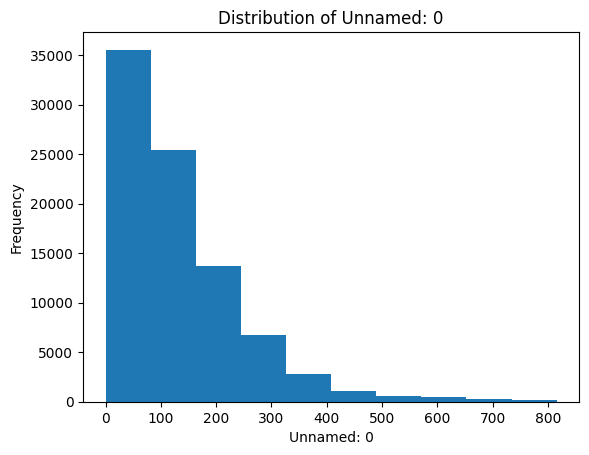

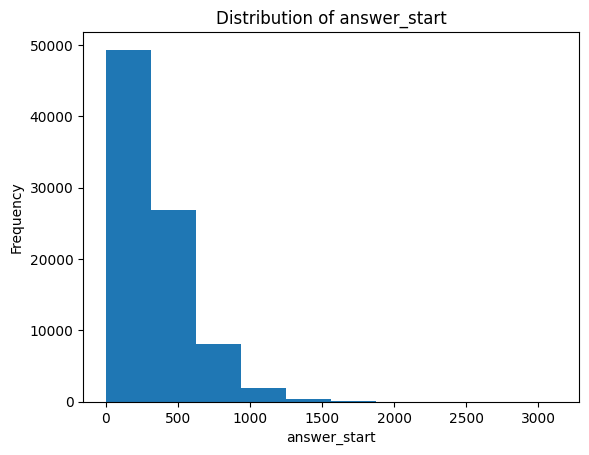

In [ ]:
import matplotlib.pyplot as plt

# Histogram for 'Unnamed: 0' column
plt.hist(df['Unnamed: 0'])
plt.xlabel('Unnamed: 0')
plt.ylabel('Frequency')
plt.title('Distribution of Unnamed: 0')
plt.show()

# Histogram for 'answer_start' column
plt.hist(df['answer_start'])
plt.xlabel('answer_start')
plt.ylabel('Frequency')
plt.title('Distribution of answer_start')
plt.show()

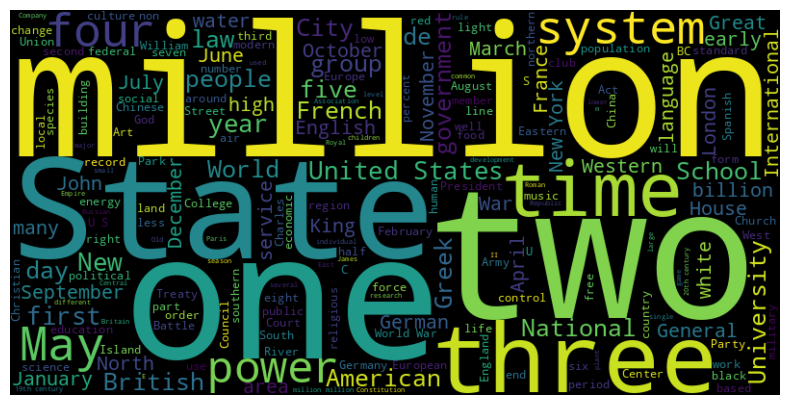

In [ ]:
!pip install wordcloud # Install wordcloud library if you haven't already



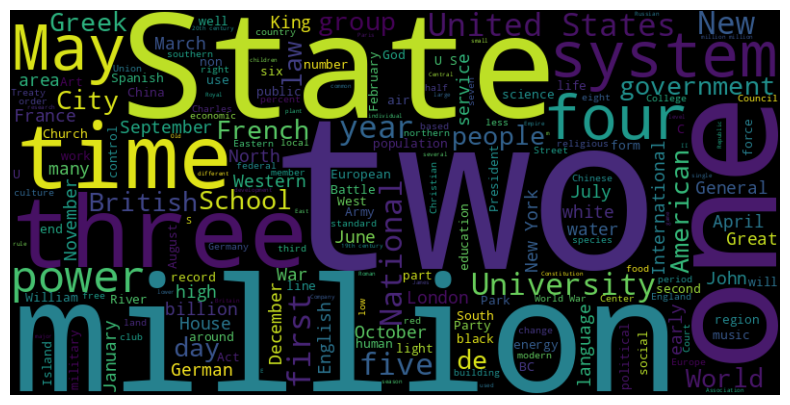

In [ ]:
from wordcloud import WordCloud

# Example: Word cloud for 'text' column
text_data = ' '.join(df['text'].astype(str).tolist())  # Combine text into a single string
wordcloud = WordCloud(width=800, height=400).generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
print(dataset.column_names)

['id', 'title', 'context', 'question', 'answers']


In [ ]:
!pip install transformers datasets accelerate gradio -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 10.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not c

In [ ]:
!pip install transformers datasets torch


In [ ]:
from transformers import DistilBertForQuestionAnswering, DistilBertTokenizerFast
from datasets import Dataset

# Load the DistilBert model and tokenizer
model_name = "distilbert-base-uncased"
model = DistilBertForQuestionAnswering.from_pretrained(model_name)
# Use DistilBertTokenizerFast instead of DistilBertTokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)


# Sample dataset load (adjust this for your actual dataset)
dataset = Dataset.from_pandas(df)  # Replace 'your_dataframe' with your actual DataFrame

# Tokenization process
def preprocess_data(batch):
    # Using 'question' and 'context' columns as you specified
    inputs = tokenizer(
        batch['question'], batch['context'],
        truncation=True, max_length=384, padding="max_length"
    )

    # Initialize lists for the start and end positions
    start_positions = []
    end_positions = []

    for i in range(len(batch['text'])): # Changed 'answers' to 'text'
        # Handle cases with missing 'text'
        answer_text = batch['text'][i]
        start_position = batch['answer_start'][i]

        if answer_text is None or start_position == -1: # Check if answer_text is None
            start_positions.append(0) # Append 0 if text is missing
            end_positions.append(0) # Append 0 if text is missing
            continue

        # Calculate the end position
        end_position = start_position + len(answer_text)

        # Tokenize the context (without special tokens) to get token positions
        context_tokens = tokenizer(batch['context'][i], add_special_tokens=False)

        # Get token indices for start and end positions
        # Handle cases where answer is outside the context
        try:
            start_idx = context_tokens.char_to_token(start_position)
            end_idx = context_tokens.char_to_token(end_position - 1)
        except TypeError:  # Handle None values or invalid positions
            start_idx = 0  # Assign a default value if not found
            end_idx = 0    # Assign a default value if not found

        # If start_idx or end_idx is None, set to 0
        if start_idx is None:
            start_idx = 0
        if end_idx is None:
            end_idx = 0

        # Append token indices for start and end positions
        start_positions.append(start_idx)
        end_positions.append(end_idx)

    return {
        'input_ids': inputs['input_ids'],
        'attention_mask': inputs['attention_mask'],
        'start_positions': start_positions,
        'end_positions': end_positions
    }

# Now, map this function to your dataset
tokenized_dataset = dataset.map(preprocess_data, batched=True)

# Check a sample from the tokenized dataset
print(tokenized_dataset[0])

Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/86821 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (718 > 512). Running this sequence through the model will result in indexing errors


{'Unnamed: 0': 0, 'context': 'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".', 'question': 'When did Beyonce start becoming popular?', 'id': '56be85543aeaaa14008c9063', 'answer_start': 269, 'text': 'in the late 1990s', 'input_ids': [101, 2043, 2106, 20773, 2707, 3352, 2759, 1029, 102, 20773, 21025, 19358, 22815, 1011, 5708, 1006, 1013, 12170, 2343

In [ ]:
# Split the dataset into train and validation sets
train_dataset = tokenized_dataset.train_test_split(test_size=0.2, seed=42)['train']
validation_dataset = tokenized_dataset.train_test_split(test_size=0.2, seed=42)['test']

In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
)

# Fine-tune the model
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,3.294700,3.045145
2,2.700100,2.568933
3,2.379400,2.471361


TrainOutput(global_step=13023, training_loss=2.9968650118963955, metrics={'train_runtime': 7998.6586, 'train_samples_per_second': 26.05, 'train_steps_per_second': 1.628, 'total_flos': 2.041794386060083e+16, 'train_loss': 2.9968650118963955, 'epoch': 3.0})

In [ ]:
# Save the fine-tuned model
trainer.save_model("./fine_tuned_model")

In [ ]:
# Function to compute metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits # Assuming logits directly represent start/end positions

    # Format predictions and labels for the metric
    formatted_predictions = [{"id": k, "prediction_text": v} for k, v in predictions.items()]
    formatted_labels = [{"id": k, "answers": v} for k, v in labels.items()]

    references = [{"id": ex["id"], "answers": ex["answers"]} for ex in validation_dataset]
    predictions = [{"id": ex["id"], "prediction_text": ""} for ex in validation_dataset]

    for i, example in enumerate(validation_dataset):
        start_logit = predictions[0][i]
        end_logit = predictions[1][i]

        # Assuming your predictions are logits for start and end positions
        start_idx = start_logit.argmax()
        end_idx = end_logit.argmax()

        # Get the predicted answer text
        all_tokens = tokenizer.convert_ids_to_tokens(example["input_ids"])
        answer = tokenizer.convert_tokens_to_string(all_tokens[start_idx : end_idx + 1])

        # Store the predicted answer
        predictions[i]["prediction_text"] = answer

    results = metric.compute(predictions=predictions, references=references)
    return results


In [ ]:
# Evaluate the model
eval_results = trainer.evaluate(eval_dataset=validation_dataset)

# Print evaluation results
print(eval_results)

{'eval_loss': 2.4713613986968994, 'eval_runtime': 184.7133, 'eval_samples_per_second': 94.011, 'eval_steps_per_second': 5.879, 'epoch': 3.0}
